In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE


In [2]:
valid = load_svmlight_file("validOutXGB")
X = valid[0].todense()
y = valid[1]


In [6]:
len(y) # this is the original dataset size

3649126

In [7]:
import time
sample_rate = 0.01
idx = np.random.randint(X.shape[0], size=int(X.shape[0]*sample_rate))
start = time.time()
X_embedding = TSNE(2).fit_transform(X[idx, :])
print("Took {0} sec to calculate tsm on {1} data rows.".format(time.time() - start, len(idx)))


In [4]:
def generate_plot(X_emb, X_mutate_emb, name=""):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("TSNE dimension1", fontsize=15)
    ax.set_ylabel("TSNE dimension2", fontsize=15)
    ax.scatter(X_emb[:,0], X_emb[:,1], color='red', alpha=0.1)
    ax.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color='blue', alpha=0.1)
    ax.grid()
    #plt.scatter(X_emb[:,0], X_emb[:,1], color='red')
    #plt.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color='blue')
    plt.savefig(name)

In [11]:
import copy
import time
import collections
"""
For TSNE it is very expensive to calculate, we need to subsample
"""
def get_mutate_embeddings(featureId, X, std=False, min_value=None, max_value=None, interval=None, value_list=None):
    b = np.array(X[:, featureId]).squeeze()
    feature_values = list(collections.Counter(list(b)).keys())
    if min_value == None:
        min_value = int(min(feature_values))
    if max_value == None:
        max_value = int(max(feature_values))
    if interval == None:
        interval = 1
    embeddings = {}
    if not value_list:
        value_list =  xrange(min_value, max_value + 1, interval)
    for value in value_list:
        tmp = copy.deepcopy(X[:, featureId])
        X[:, featureId] = value
        start = time.time()
        if not std:
            X_emb = TSNE(2).fit_transform(X)
        else:
            X_emb = TSNE(2).fit_transform(StandardScaler().fit_transform(X))
        print("Took {0} sec to calculate tsm on {1} data rows.".format(time.time() - start, len(X)))    
        X[:, featureId] = tmp
        embeddings[value] = X_emb
    return embeddings
        

In [12]:
featureId = 6
mutated_embeddings = get_mutate_embeddings(featureId, X[idx, :], value_list=[0, 100, 3000, 30000])

Took 335.5849840641022 sec to calculate tsm on 36491 data rows.
Took 336.2001984119415 sec to calculate tsm on 36491 data rows.
Took 351.72160053253174 sec to calculate tsm on 36491 data rows.
Took 340.5757622718811 sec to calculate tsm on 36491 data rows.


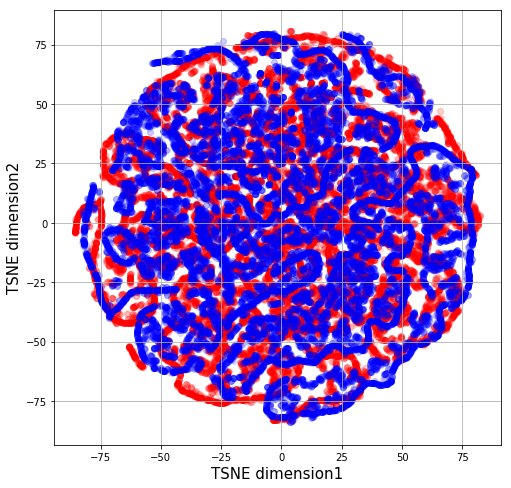

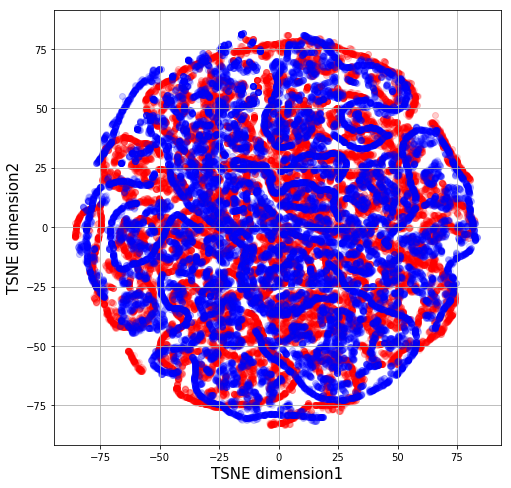

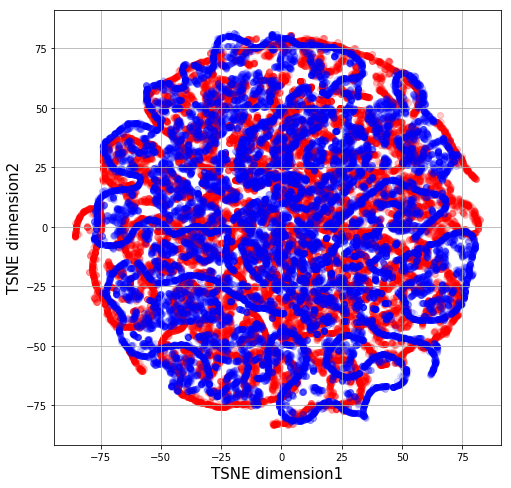

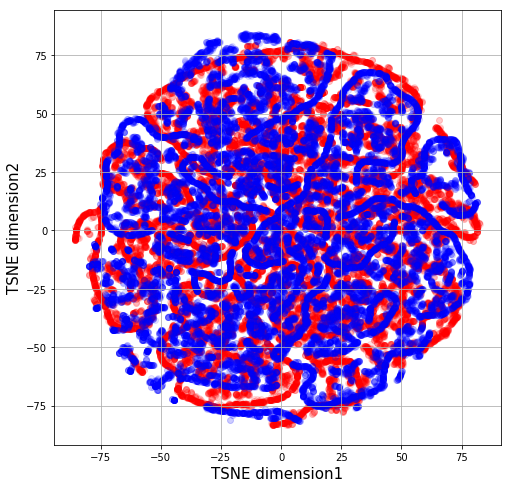

In [15]:
for feature_value in mutated_embeddings.keys():
    generate_plot(X_embedding, mutated_embeddings[feature_value], name="tsne_feature{0}={1}".format(featureId, feature_value))
